In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
import zipfile
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

In [ ]:
import os
import glob

In [ ]:
zipped_images = "/content/drive/MyDrive/Colab Notebooks/BreastCancer/final_train_images.zip"
unzip_output = "/content/sample_data/BreastCancer/"

In [ ]:
with zipfile.ZipFile(zipped_images, 'r') as z:
  z.extractall(unzip_output)

In [ ]:
img_folder = unzip_output + "SDLjpg1024/"

In [ ]:
len(list(glob.glob(img_folder + "**/*")))

54706

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BreastCancer/train.csv")

In [ ]:
df.shape

(54706, 14)

In [ ]:
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [ ]:
df['file_path'] = df.apply(lambda r : os.path.join(img_folder, str(r['patient_id']), str(r['image_id']) + '.jpg'), axis=1)

In [ ]:
df['patient_laterality'] = df['patient_id'].astype('str') + "_" + df['laterality']

In [ ]:
df.head(10)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,file_path,patient_laterality
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10006_L
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10006_L
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10006_R
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10006_R
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,/content/sample_data/BreastCancer/SDLjpg1024/1...,10011_L
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True,/content/sample_data/BreastCancer/SDLjpg1024/1...,10011_L
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10011_R
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10011_R
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10025_L
9,2,10025,1365269360,L,MLO,75.0,0,0,0,NaN,0,NaN,29,False,/content/sample_data/BreastCancer/SDLjpg1024/1...,10025_L


In [ ]:
df['difficult_negative_case'] = df['difficult_negative_case'].astype('int')

In [ ]:
df_img = pd.pivot_table(df, index='patient_laterality', columns='view', values='file_path', aggfunc='first').dropna(axis=1)

In [ ]:
df_target = df.groupby('patient_laterality')[['cancer', 'implant', 'machine_id', 'difficult_negative_case']].max()

In [ ]:
df3 = pd.concat([df_img, df_target], axis=1).reset_index()

In [ ]:
df3['cancer'].value_counts()

0    23334
1      492
Name: cancer, dtype: int64

In [ ]:
print("the breast cancer rate in the population is {}".format(492/23334))

the breast cancer rate in the population is 0.02108511185394703


In [ ]:
df3['implant'].value_counts()

0    23484
1      342
Name: implant, dtype: int64

In [ ]:
df3['machine_id'].value_counts()

49     9178
48     4148
29     4042
21     4000
93      775
216     772
210     468
170     382
190      53
197       8
Name: machine_id, dtype: int64

In [ ]:
df3['difficult_negative_case'].value_counts()

0    20545
1     3281
Name: difficult_negative_case, dtype: int64

In [ ]:
machine_ids = sorted(df3['machine_id'].unique())
n_machines = len(machine_ids)

In [ ]:
df3['machine_id'] = df3['machine_id'].map({v:i for i, v in enumerate(machine_ids)})

In [ ]:
df3.head()

,patient_laterality,CC,MLO,cancer,implant,machine_id,difficult_negative_case
0,10006_L,/content/sample_data/BreastCancer/SDLjpg1024/1...,/content/sample_data/BreastCancer/SDLjpg1024/1...,0,0,1,0
1,10006_R,/content/sample_data/BreastCancer/SDLjpg1024/1...,/content/sample_data/BreastCancer/SDLjpg1024/1...,0,0,1,0
2,10011_L,/content/sample_data/BreastCancer/SDLjpg1024/1...,/content/sample_data/BreastCancer/SDLjpg1024/1...,0,0,0,1
3,10011_R,/content/sample_data/BreastCancer/SDLjpg1024/1...,/content/sample_data/BreastCancer/SDLjpg1024/1...,0,0,0,0
4,10025_L,/content/sample_data/BreastCancer/SDLjpg1024/1...,/content/sample_data/BreastCancer/SDLjpg1024/1...,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df3, test_size=0.2, train_size=0.8, stratify=df3['cancer'])

In [ ]:
def oversampling(df, feature, fold):
  pos_df = df[df[feature] != 0]
  neg_df = df[df[feature] == 0]
  new_df = pd.concat([pos_df] * fold + [neg_df], axis=0, ignore_index=True)
  new_df = new_df.sample(frac=1).reset_index(drop=True)
  return new_df

In [ ]:
train_df = oversampling(train_df, 'cancer', 5)
train_ds = tf.data.Dataset.from_tensor_slices(dict(train_df)).shuffle(1000)
val_ds = tf.data.Dataset.from_tensor_slices(dict(val_df))

In [ ]:
for d in train_ds.take(5):
  print(d)

{'patient_laterality': <tf.Tensor: shape=(), dtype=string, numpy=b'4877_L'>, 'CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/content/sample_data/BreastCancer/SDLjpg1024/4877/1166472555.jpg'>, 'MLO': <tf.Tensor: shape=(), dtype=string, numpy=b'/content/sample_data/BreastCancer/SDLjpg1024/4877/1925162297.jpg'>, 'cancer': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'implant': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'machine_id': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'difficult_negative_case': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
{'patient_laterality': <tf.Tensor: shape=(), dtype=string, numpy=b'52249_R'>, 'CC': <tf.Tensor: shape=(), dtype=string, numpy=b'/content/sample_data/BreastCancer/SDLjpg1024/52249/1691134416.jpg'>, 'MLO': <tf.Tensor: shape=(), dtype=string, numpy=b'/content/sample_data/BreastCancer/SDLjpg1024/52249/1921556443.jpg'>, 'cancer': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'implant': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'machine_id': <t

In [ ]:
img_size = 512
def map_to_img(ds):
    p1 = ds['CC']
    p2 = ds['MLO']
    img1 = tf.io.read_file(p1)
    img1 = tf.io.decode_jpeg(img1, channels=1)
    img1 = tf.image.resize(img1, (img_size, img_size), antialias=True)
    img2 = tf.io.read_file(p2)
    img2 = tf.io.decode_jpeg(img2, channels=1)
    img2 = tf.image.resize(img2, (img_size, img_size), antialias=True)
    # imgL = tf.concat([img1, img2], axis=1)
    # imgR = tf.concat([img3, img4], axis=1)
    # img_arr = tf.concat([imgL, imgR], axis=0)
    return (img1, img2), (ds['cancer'], ds['implant'], ds['difficult_negative_case'])

In [ ]:
train_ds = train_ds.map(map_to_img)
val_ds = val_ds.map(map_to_img)

In [ ]:
for img, target in train_ds.take(5):
    print(img[1].shape)
    print(target)

(512, 512, 1)
(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(512, 512, 1)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(512, 512, 1)
(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(512, 512, 1)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(512, 512, 1)
(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


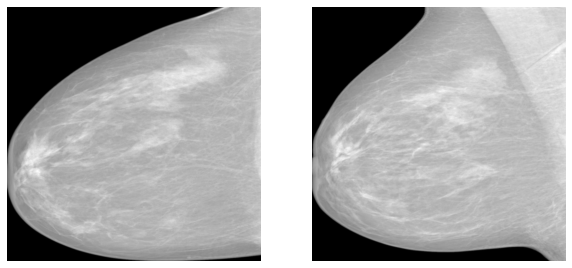

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[0], cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img[1], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
batch_size = 32
train_ds = train_ds.batch(batch_size).prefetch(batch_size)
val_ds = val_ds.batch(batch_size).prefetch(batch_size)

In [ ]:
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

In [ ]:
img_augmentation = tf.keras.models.Sequential([
    layers.RandomRotation(factor=0.15),
    layers.RandomFlip(),
    layers.RandomZoom(0.1)
])

def build_model():
  pretrained_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
  pretrained_model.trainable = True

  input_img1 = layers.Input(shape=(img_size, img_size, 1))
  input_img2 = layers.Input(shape=(img_size, img_size, 1))
  x1 = img_augmentation(input_img1)
  x2 = img_augmentation(input_img2)
  x = tf.concat([x1, x2], axis=2)
  x = tf.concat([x,x,x], axis=-1)
  x = pretrained_model(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(256)(x)
  x = layers.Dropout(0.3)(x)
  output_cancer = layers.Dense(1, name="cancer")(x)
  output_implant = layers.Dense(1, name="implant")(x)
  # output_machine = layers.Dense(n_machines)(x)
  output_difficult = layers.Dense(1, name="difficult")(x)
  model = tf.keras.Model(
      inputs = [input_img1, input_img2], 
      outputs = [output_cancer, output_implant, output_difficult]
      )
  return model

In [ ]:
# model = build_model()

In [ ]:
# model.summary()

In [ ]:
def lr_schedule(epoch):
  if epoch < 2:
    return 1e-3
  elif epoch < 6:
    return 1e-4
  else:
    return 5e-5

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

# Then build your model within the strategy context:
tf.keras.backend.clear_session()
with strategy.scope():
    model = build_model()
    model.compile(
      loss = [tf.keras.losses.BinaryCrossentropy(from_logits=True),
              tf.keras.losses.BinaryCrossentropy(from_logits=True),
              tf.keras.losses.BinaryCrossentropy(from_logits=True)],
      loss_weights = [0.8, 0.1, 0.1],
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics = [tf.keras.metrics.Accuracy(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.AUC()]
      )

model.summary()

Not connected to a TPU runtime. Using CPU/GPU strategy
16705208/16705208 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 512, 512, 1)  0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']            

In [ ]:
# model.compile(
#   loss = [tf.keras.losses.BinaryCrossentropy(from_logits=True),
#           tf.keras.losses.BinaryCrossentropy(from_logits=True),
#           tf.keras.losses.BinaryCrossentropy(from_logits=True)],
#   loss_weights = [0.8, 0.1, 0.1],
#   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
#   metrics = [tf.keras.metrics.Accuracy(),
#             tf.keras.metrics.Recall(),
#             tf.keras.metrics.Precision(),
#             tf.keras.metrics.AUC()]
#   )

In [ ]:
cp_dir = "/content/drive/MyDrive/Colab Notebooks/BreastCancer/checkpoints6"
if not os.path.exists(cp_dir):
  os.mkdir(cp_dir)
checkpoint_path = cp_dir + "/cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.load_weights("/content/drive/MyDrive/Colab Notebooks/BreastCancer/SavedWeights_ep0006.h5")

In [ ]:
y_pred = tf.nn.sigmoid(model.predict(val_ds)[0]).numpy().flatten()
y_pred = (y_pred > 0.5).astype('int')


149/149 [==============================] - 16s 108ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

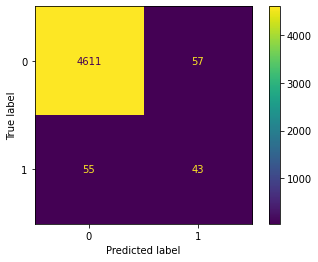

In [ ]:
cm = confusion_matrix(val_df['cancer'], y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# epochs = 15
# r = model.fit(
#     train_ds,
#     epochs=epochs,
#     validation_data = val_ds,
#     callbacks=[callback, cp_callback]
# )

Epoch 1/15


645/645 [==============================] - ETA: 0s - loss: 0.3042 - cancer_loss: 0.3256 - implant_loss: 0.0397 - difficult_loss: 0.3976 - cancer_accuracy: 0.0000e+00 - cancer_recall: 0.0107 - cancer_precision: 0.2561 - cancer_auc: 0.5081 - implant_accuracy: 0.0000e+00 - implant_recall: 0.4640 - implant_precision: 0.8269 - implant_auc: 0.7563 - difficult_accuracy: 0.0000e+00 - difficult_recall: 0.0011 - difficult_precision: 0.2000 - difficult_auc: 0.4998
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/BreastCancer/checkpoints6/cp-0001.ckpt
645/645 [==============================] - 608s 865ms/step - loss: 0.3042 - cancer_loss: 0.3256 - implant_loss: 0.0397 - difficult_loss: 0.3976 - cancer_accuracy: 0.0000e+00 - cancer_recall: 0.0107 - cancer_precision: 0.2561 - cancer_auc: 0.5081 - implant_accuracy: 0.0000e+00 - implant_recall: 0.4640 - implant_precision: 0.8269 - implant_auc: 0.7563 - difficult_accuracy: 0.0000e+00 - difficult_recall: 0.0011 - difficult_precision: 0.20

In [ ]:
for i in range(1,1+epochs):
  model.load_weights(cp_dir + "/cp-{:04d}.ckpt".format(i))
  model.save_weights("/content/drive/MyDrive/Colab Notebooks/BreastCancer/SavedWeights_ep{:04d}.h5".format(i))

In [ ]:
# model.load_weights(cp_dir + "/cp-0005.ckpt")

In [ ]:
model.evaluate(val_ds)

149/149 [==============================] - 18s 118ms/step - loss: 0.1933 - cancer_loss: 0.1899 - implant_loss: 0.0199 - difficult_loss: 0.3939 - cancer_accuracy: 0.0000e+00 - cancer_recall: 0.1531 - cancer_precision: 0.3061 - cancer_auc: 0.5774 - implant_accuracy: 0.0000e+00 - implant_recall: 0.8088 - implant_precision: 0.8594 - implant_auc: 0.9108 - difficult_accuracy: 0.0000e+00 - difficult_recall: 0.0000e+00 - difficult_precision: 0.0000e+00 - difficult_auc: 0.5000


[0.19327807426452637,
 0.1898730844259262,
 0.019912375137209892,
 0.393884539604187,
 0.0,
 0.15306122601032257,
 0.30612245202064514,
 0.5774487853050232,
 0.0,
 0.8088235259056091,
 0.859375,
 0.9108476042747498,
 0.0,
 0.0,
 0.0,
 0.5]

In [ ]:
# model.save_weights("/content/drive/MyDrive/Colab Notebooks/BreastCancer/weights_v3.h5")
# model.save("/content/drive/MyDrive/Colab Notebooks/BreastCancer/efficientnetb0_trained0.2817.h5")

In [ ]:
from google.colab import runtime
runtime.unassign()